<a href="https://colab.research.google.com/github/Jehmary/Machine-Learning-Basics/blob/main/PCT04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Classification of Images of Balls**

####**Importing the Necessary Libraries**

In [68]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import os
import cv2 as cv
import fnmatch

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

from sklearn import datasets
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

####**Importing the Data**

Mounting Google Drive

In [2]:
from google.colab import drive
drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


Redirecting directory to "Balls" folder

In [3]:
%cd /content/gdrive/MyDrive/'Colab Notebooks'/Book/Balls

/content/gdrive/MyDrive/Colab Notebooks/Book/Balls


In [ ]:
%ls

Randomizing data by shuffling

In [5]:
# Takes the data frames of files from directory
unshuffled_data = pd.DataFrame.from_dict(os.listdir())
# Shuffles the data with a replicable random state (value of 1)
shuffled_data   = unshuffled_data.sample(frac=1, random_state=1).reset_index()
# Stores the first column of the data (file names) as list
data            = pd.DataFrame(shuffled_data)[0].values.tolist()

In [ ]:
print(data)

['bowling19.jpg', 'billiards41.jpg', 'volleyball35.png', 'bowling41.jpg', 'tabletennis28.jpg', 'football23.png', 'tabletennis12.jpg', 'volleyball11.jpg', 'tabletennis34.png', 'basketball29.jpg', 'tabletennis27.jpg', 'tabletennis48.jpg', 'tennis50.jpg', 'billiards29.jpg', 'tennis49.png', 'billiards01.png', 'soccer50.jpg', 'baseball46.jpg', 'football19.jpg', 'tabletennis46.jpg', 'football25.jpg', 'basketball35.jpg', 'volleyball10.jpg', 'bowling04.jpg', 'football24.jpg', 'billiards44.jpg', 'football22.jpg', 'golf04.jpg', 'volleyball17.jpg', 'tabletennis40.png', 'baseball07.jpg', 'baseball36.png', 'billiards32.png', 'baseball30.png', 'tabletennis37.jpg', 'volleyball00.jpg', 'tabletennis09.jpg', 'football26.jpg', 'tabletennis15.jpg', 'football37.png', 'basketball43.jpg', 'basketball25.jpg', 'football39.jpg', 'basketball32.png', 'baseball29.jpg', 'golf20.jpg', 'tennis43.jpg', 'football50.png', 'volleyball37.jpeg', 'volleyball51.png', 'soccer04.jpg', 'tennis02.jpg', 'volleyball38.jpg', 'bowli

Reading image files and excluding those not rescaled to 28x28



In [6]:
m = 0
list_files = []
# Reading files as images and excluding images not rescaled to 28x28x3
for file in data:
  image = cv.imread(file)
  if image.shape == (28,28,3):
    list_files.append(image)
  else:
    m += 1
print(str(m) + ' images were not rescaled to 28x28 and are now excluded.')
# This code can read WEBP files

44 images were not rescaled to 28x28 and are now excluded.


Verifying shape of image file and number of samples

In [7]:
# Shape of each image file
print(list_files[0].shape)
# Number of samples
print(len(list_files))

(28, 28, 3)
495


Data and plot of first image

[[[255 255 255]
  [255 255 255]
  [255 255 254]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [254 254 254]
  ...
  [254 254 254]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]


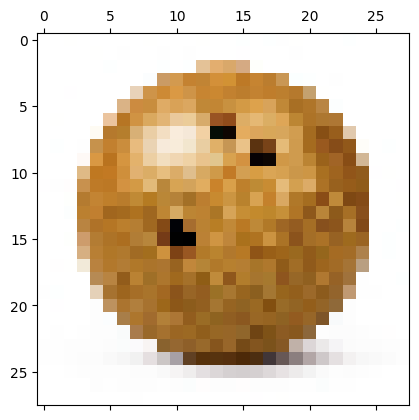

In [8]:
# Data of first image
print(list_files[0])
# Plot of first image
plt.matshow(list_files[0])

Flattening the data

In [9]:
# Flattening the data into a 4D list
flat_files = np.stack((list_files[i] for i in range(len(list_files))))
print(flat_files.shape)
# This serves as the X values

(495, 28, 28, 3)


/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3473: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  if (await self.run_code(code, result,  async_=asy)):


####**Adding labels to data sets**

Matching name of file to a label

In [11]:
# matching name of file to accounted file names for labelling using numbers
baseballXX    = 'baseball*'     #0
basketballXX  = 'basketball*'   #1
billiardsXX   = 'billiards*'    #2
bowlingXX     = 'bowling*'      #3
footballXX    = 'football*'     #4
golfXX        = 'golf*'         #5
soccerXX      = 'soccer*'       #6
tabletennisXX = 'tabletennis*'  #7
tennisXX      = 'tennis*'       #8
volleyballXX  = 'volleyball*'   #9
label         = []
for filename in data:
  image = cv.imread(filename)
  if image.shape == (28,28,3):
    if fnmatch.fnmatch(filename, baseballXX) == True:
      label.append(0)
    elif fnmatch.fnmatch(filename, basketballXX) == True:
      label.append(1)
    elif fnmatch.fnmatch(filename, billiardsXX) == True:
      label.append(2)
    elif fnmatch.fnmatch(filename, bowlingXX) == True:
      label.append(3)
    elif fnmatch.fnmatch(filename, footballXX) == True:
      label.append(4)
    elif fnmatch.fnmatch(filename, golfXX) == True:
      label.append(5)
    elif fnmatch.fnmatch(filename, soccerXX) == True:
      label.append(6)
    elif fnmatch.fnmatch(filename, tabletennisXX) == True:
      label.append(7)
    elif fnmatch.fnmatch(filename, tennisXX) == True:
      label.append(8)
    elif fnmatch.fnmatch(filename, volleyballXX) == True:
      label.append(9)
    else:
      print(filename + ' is not accounted.')

label = np.reshape(label, (len(label),))
print(label.shape)
print(label)
# This serves as the Y values

(495,)
[3 2 9 3 7 4 7 9 7 1 7 7 8 2 8 2 6 0 4 7 4 1 9 4 2 4 5 9 7 0 0 2 0 7 9 7 4
 7 4 1 1 4 1 0 5 8 4 9 9 6 8 3 1 7 4 2 1 5 8 6 1 7 2 1 0 7 8 0 5 1 1 2 6 5
 0 9 1 9 3 4 1 5 9 1 5 1 5 5 4 8 2 7 7 5 7 1 6 2 5 9 0 8 8 4 6 5 3 3 4 7 5
 6 7 8 7 0 6 9 0 1 3 8 3 1 6 0 2 1 1 2 8 8 4 0 6 8 3 3 9 9 5 6 0 2 3 1 0 0
 6 5 5 8 7 0 9 0 9 5 7 1 2 5 7 3 5 6 9 5 6 4 6 7 3 5 8 5 8 9 4 2 9 2 1 7 9
 9 5 7 0 0 8 0 1 1 9 6 1 9 5 8 4 7 7 2 6 5 2 4 2 3 5 8 3 2 3 1 2 5 2 6 9 4
 1 1 8 3 7 3 9 9 4 3 9 1 6 8 6 6 7 8 4 1 1 2 0 1 6 2 3 6 9 9 0 3 5 1 7 6 7
 9 0 3 5 6 0 9 5 3 9 3 6 5 4 6 7 0 3 5 2 3 8 4 0 2 6 2 1 1 0 0 8 1 8 9 1 0
 2 8 4 5 8 9 0 3 1 1 5 8 0 6 2 0 6 1 4 8 0 7 4 7 4 8 6 3 0 0 6 0 6 3 2 9 6
 4 9 7 2 4 9 4 5 3 8 8 6 1 5 4 4 5 6 8 3 3 7 2 7 6 3 8 3 4 6 2 8 4 5 6 5 2
 8 1 4 5 5 6 0 5 7 5 2 7 2 8 6 4 4 3 0 3 5 2 5 9 7 2 4 6 0 1 5 2 8 0 2 3 7
 3 5 4 9 8 0 2 5 2 1 6 2 5 9 9 9 0 4 8 8 2 1 7 4 7 7 9 6 3 0 3 0 9 2 7 7 6
 3 7 8 4 3 3 7 7 2 3 2 0 8 0 5 3 9 9 0 4 4 0 0 4 4 7 8 9 8 6 8 1 1 2 6 1 3
 3 6 2 8 1 6 7 3 0

Verifying number of samples per category

In [22]:
# Count instances of each category in the list
print('Baseball: ' + str(pd.Series(label).value_counts()[0]) + '\nBasketball: ' + str(pd.Series(label).value_counts()[1]) +
'\nBilliards: ' + str(pd.Series(label).value_counts()[2]) + '\nBowling: ' + str(pd.Series(label).value_counts()[3]) + 
'\nFootball: ' + str(pd.Series(label).value_counts()[4]) + '\nGolf: ' + str(pd.Series(label).value_counts()[5]) + 
'\nSoccer: ' + str(pd.Series(label).value_counts()[6]) + '\nTabletennis: ' + str(pd.Series(label).value_counts()[7]) + 
'\nTennis: ' + str(pd.Series(label).value_counts()[8]) + '\nVolleyball: ' + str(pd.Series(label).value_counts()[9]))

Baseball: 51
Basketball: 50
Billiards: 49
Bowling: 49
Football: 47
Golf: 50
Soccer: 49
Tabletennis: 51
Tennis: 50
Volleyball: 49


####**Defining training data and testing data sets**

Allocating 80% of the data for training, 10% for validating, and 10% for testing.

In [117]:
trainRatio = 80/100
valRatio = 15/100
testRatio = 5/100

X_train, X_test, y_train, y_test = train_test_split(flat_files, label, test_size = 1 - trainRatio)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size = testRatio/(testRatio + valRatio))

#####**Preparing the Data**

Rescaling the data to improve the accuracy

In [118]:
X_train = X_train/255
X_test = X_test/255
X_val = X_val/255

Shapes of the data sets

In [119]:
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)

(396, 28, 28, 3)
(25, 28, 28, 3)
(74, 28, 28, 3)


####**Defining the model**

In [121]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(70, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation='softmax'),
])

model.summary()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_42 (Conv2D)          (None, 26, 26, 32)        896       
                                                                 
 max_pooling2d_42 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 dropout_85 (Dropout)        (None, 13, 13, 32)        0         
                                                                 
 conv2d_43 (Conv2D)          (None, 11, 11, 256)       73984     
                                                                 
 max_pooling2d_43 (MaxPoolin  (None, 5, 5, 256)        0         
 g2D)                                                            
                                                                 
 dropout_86 (Dropout)        (None, 5, 5, 256)       

####**Compiling the model**

Using Adam as optimization function with a learning rate of 0.001.

In [122]:
epochs        = 500
learning_rate = 0.0008
opt = keras.optimizers.Adam(learning_rate=learning_rate)
model.compile(optimizer = opt,
              loss = tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

####**Training the model**

In [123]:
history = model.fit(X_train, y_train, epochs=epochs, validation_data=(X_val, y_val), verbose=1)

Epoch 1/500
13/13 [==============================] - 3s 149ms/step - loss: 2.4053 - accuracy: 0.1035 - val_loss: 2.3031 - val_accuracy: 0.1081
Epoch 2/500
13/13 [==============================] - 1s 80ms/step - loss: 2.3030 - accuracy: 0.1439 - val_loss: 2.2883 - val_accuracy: 0.1216
Epoch 3/500
13/13 [==============================] - 1s 77ms/step - loss: 2.2776 - accuracy: 0.1364 - val_loss: 2.2782 - val_accuracy: 0.1351
Epoch 4/500
13/13 [==============================] - 1s 75ms/step - loss: 2.2293 - accuracy: 0.1692 - val_loss: 2.2349 - val_accuracy: 0.2703
Epoch 5/500
13/13 [==============================] - 1s 77ms/step - loss: 2.1821 - accuracy: 0.2146 - val_loss: 2.1766 - val_accuracy: 0.1622
Epoch 6/500
13/13 [==============================] - 1s 73ms/step - loss: 2.1448 - accuracy: 0.1995 - val_loss: 2.1458 - val_accuracy: 0.3378
Epoch 7/500
13/13 [==============================] - 1s 75ms/step - loss: 2.0771 - accuracy: 0.2247 - val_loss: 2.0795 - val_accuracy: 0.3378
Epoch

####**Evaluating the performance**

1/1 [==============================] - 0s 44ms/step - loss: 0.2082 - accuracy: 0.8800


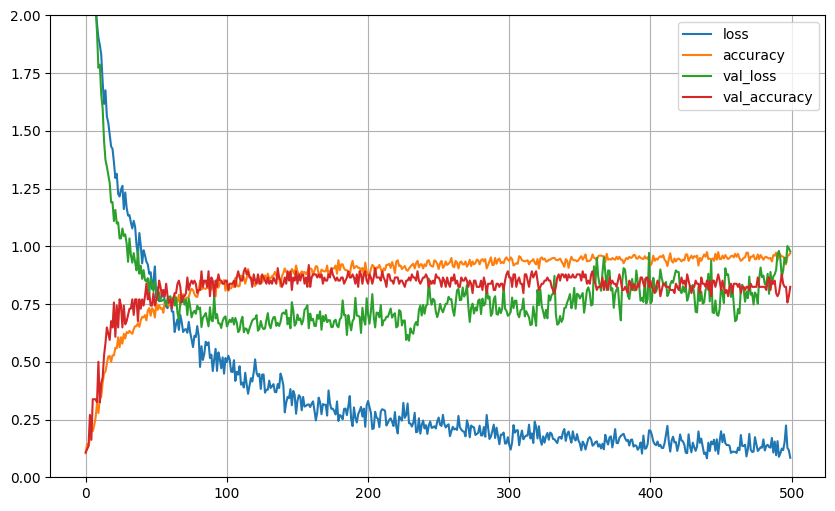

In [125]:
model.evaluate(X_test, y_test)

pd.DataFrame(history.history).plot(figsize=(10,6))
plt.grid(True)
plt.gca().set_ylim(0,2)
plt.show()

1/1 [==============================] - 0s 137ms/step


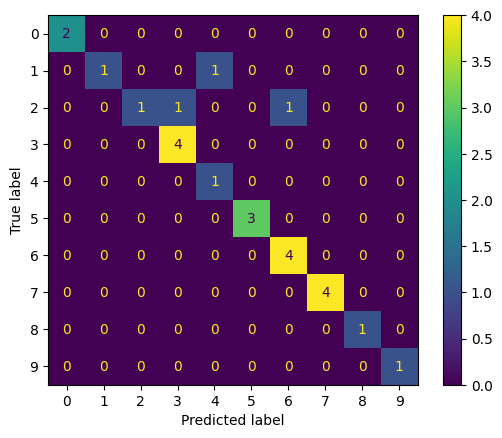

88.0


In [126]:
prediction = model.predict(X_test)
predicted_labels = [np.argmax(i) for i in prediction]

cm = confusion_matrix(y_test, prediction.argmax(axis=1))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

accuracy = 100*np.trace(cm)/np.sum(cm)
print(accuracy)

In [127]:
# Expected instances of each category in the testing data
print('Baseball: ' + str(pd.Series(y_test).value_counts()[0]) + '\nBasketball: ' + str(pd.Series(y_test).value_counts()[1]) +
'\nBilliards: ' + str(pd.Series(y_test).value_counts()[2]) + '\nBowling: ' + str(pd.Series(y_test).value_counts()[3]) + 
'\nFootball: ' + str(pd.Series(y_test).value_counts()[4]) + '\nGolf: ' + str(pd.Series(y_test).value_counts()[5]) + 
'\nSoccer: ' + str(pd.Series(y_test).value_counts()[6]) + '\nTabletennis: ' + str(pd.Series(y_test).value_counts()[7]) + 
'\nTennis: ' + str(pd.Series(y_test).value_counts()[8]) + '\nVolleyball: ' + str(pd.Series(y_test).value_counts()[9]))

Baseball: 2
Basketball: 2
Billiards: 3
Bowling: 4
Football: 1
Golf: 3
Soccer: 4
Tabletennis: 4
Tennis: 1
Volleyball: 1


Text(45.722222222222214, 0.5, 'True Label')

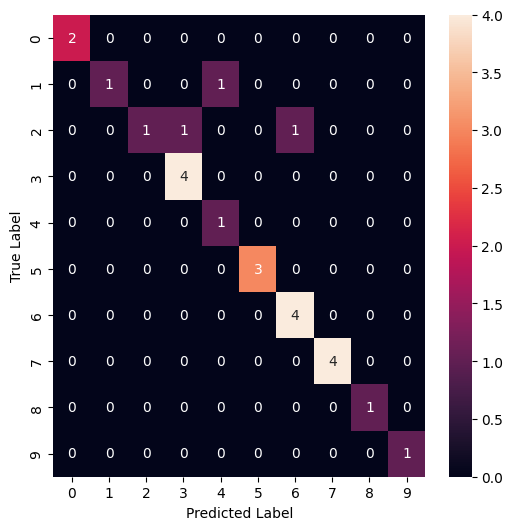

In [128]:
# Alternative Code for Displaying Confusion Matrix
import seaborn as sn
plt.figure(figsize = (6,6))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')